# 附件一预处理（不包括异常值剔除及标准化）

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_excel("Data\\First\\New\\201404100843.xlsx",sheet_name='201404100843')
data

,月,日,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,起飞机场,落地机场,俯仰角率.1,飞机重量
0,4,10,8:43:26,-83,1,-8,30.0,10.00,DOWN,False,...,-0.04,-3.30,2.59,2.45,2.81,-0.0625,机场68,机场73,-0.0625,250080
1,4,10,8:43:27,-84,8,-8,30.0,9.75,DOWN,False,...,1.76,-3.83,3.01,3.39,2.97,0.1250,机场68,机场73,0.1250,250080
2,4,10,8:43:28,-83,6,-8,30.0,9.50,DOWN,False,...,-1.54,-2.81,2.95,3.13,3.07,0.0000,机场68,机场73,0.0000,250080
3,4,10,8:43:29,-83,1,-8,30.0,9.25,DOWN,False,...,-1.62,-3.42,1.02,1.75,0.99,0.0000,机场68,机场73,0.0000,250080
4,4,10,8:43:30,-83,-2,-8,30.0,9.00,DOWN,False,...,0.28,-2.18,3.43,2.64,3.16,0.0625,机场68,机场73,0.0625,250080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6980,4,10,10:39:48,7,-3,-8,30.0,1.50,DOWN,False,...,0.60,-2.79,-3.43,-4.92,-3.46,-0.0625,机场68,机场73,-0.0625,236960
6981,4,10,10:39:49,8,-12,-8,30.0,1.50,DOWN,False,...,0.58,-2.05,-3.39,-4.97,-3.39,-0.0625,机场68,机场73,-0.0625,236960
6982,4,10,10:39:50,9,-25,-8,30.0,1.50,DOWN,False,...,0.67,-1.37,-3.49,-5.03,-3.51,0.0000,机场68,机场73,0.0000,236960
6983,4,10,10:39:51,14,-69,-8,30.0,1.50,DOWN,False,...,-0.57,-1.52,-3.12,-5.03,-3.14,0.0000,机场68,机场73,0.0000,236960


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6985 entries, 0 to 6984
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   月              6985 non-null   int64  
 1   日              6985 non-null   int64  
 2   具体时间           6985 non-null   object 
 3   海拔高度           6985 non-null   int64  
 4   下降率            6985 non-null   int64  
 5   无线电高度          6985 non-null   int64  
 6   计算空速           6985 non-null   float64
 7   地速             6985 non-null   float64
 8   起落架            1869 non-null   object 
 9   空地电门0.2秒       6985 non-null   bool   
 10  空地电门0.4秒       6985 non-null   bool   
 11  空地电门0.6秒       6985 non-null   bool   
 12  空地电门0.8秒       6985 non-null   bool   
 13  空地电门1秒         6985 non-null   bool   
 14  着陆G值0.1秒       6985 non-null   float64
 15  着陆G值0.2秒       6985 non-null   float64
 16  着陆G值0.3秒       6985 non-null   float64
 17  着陆G值0.4秒       6985 non-null   float64
 18  着陆G值0.5秒

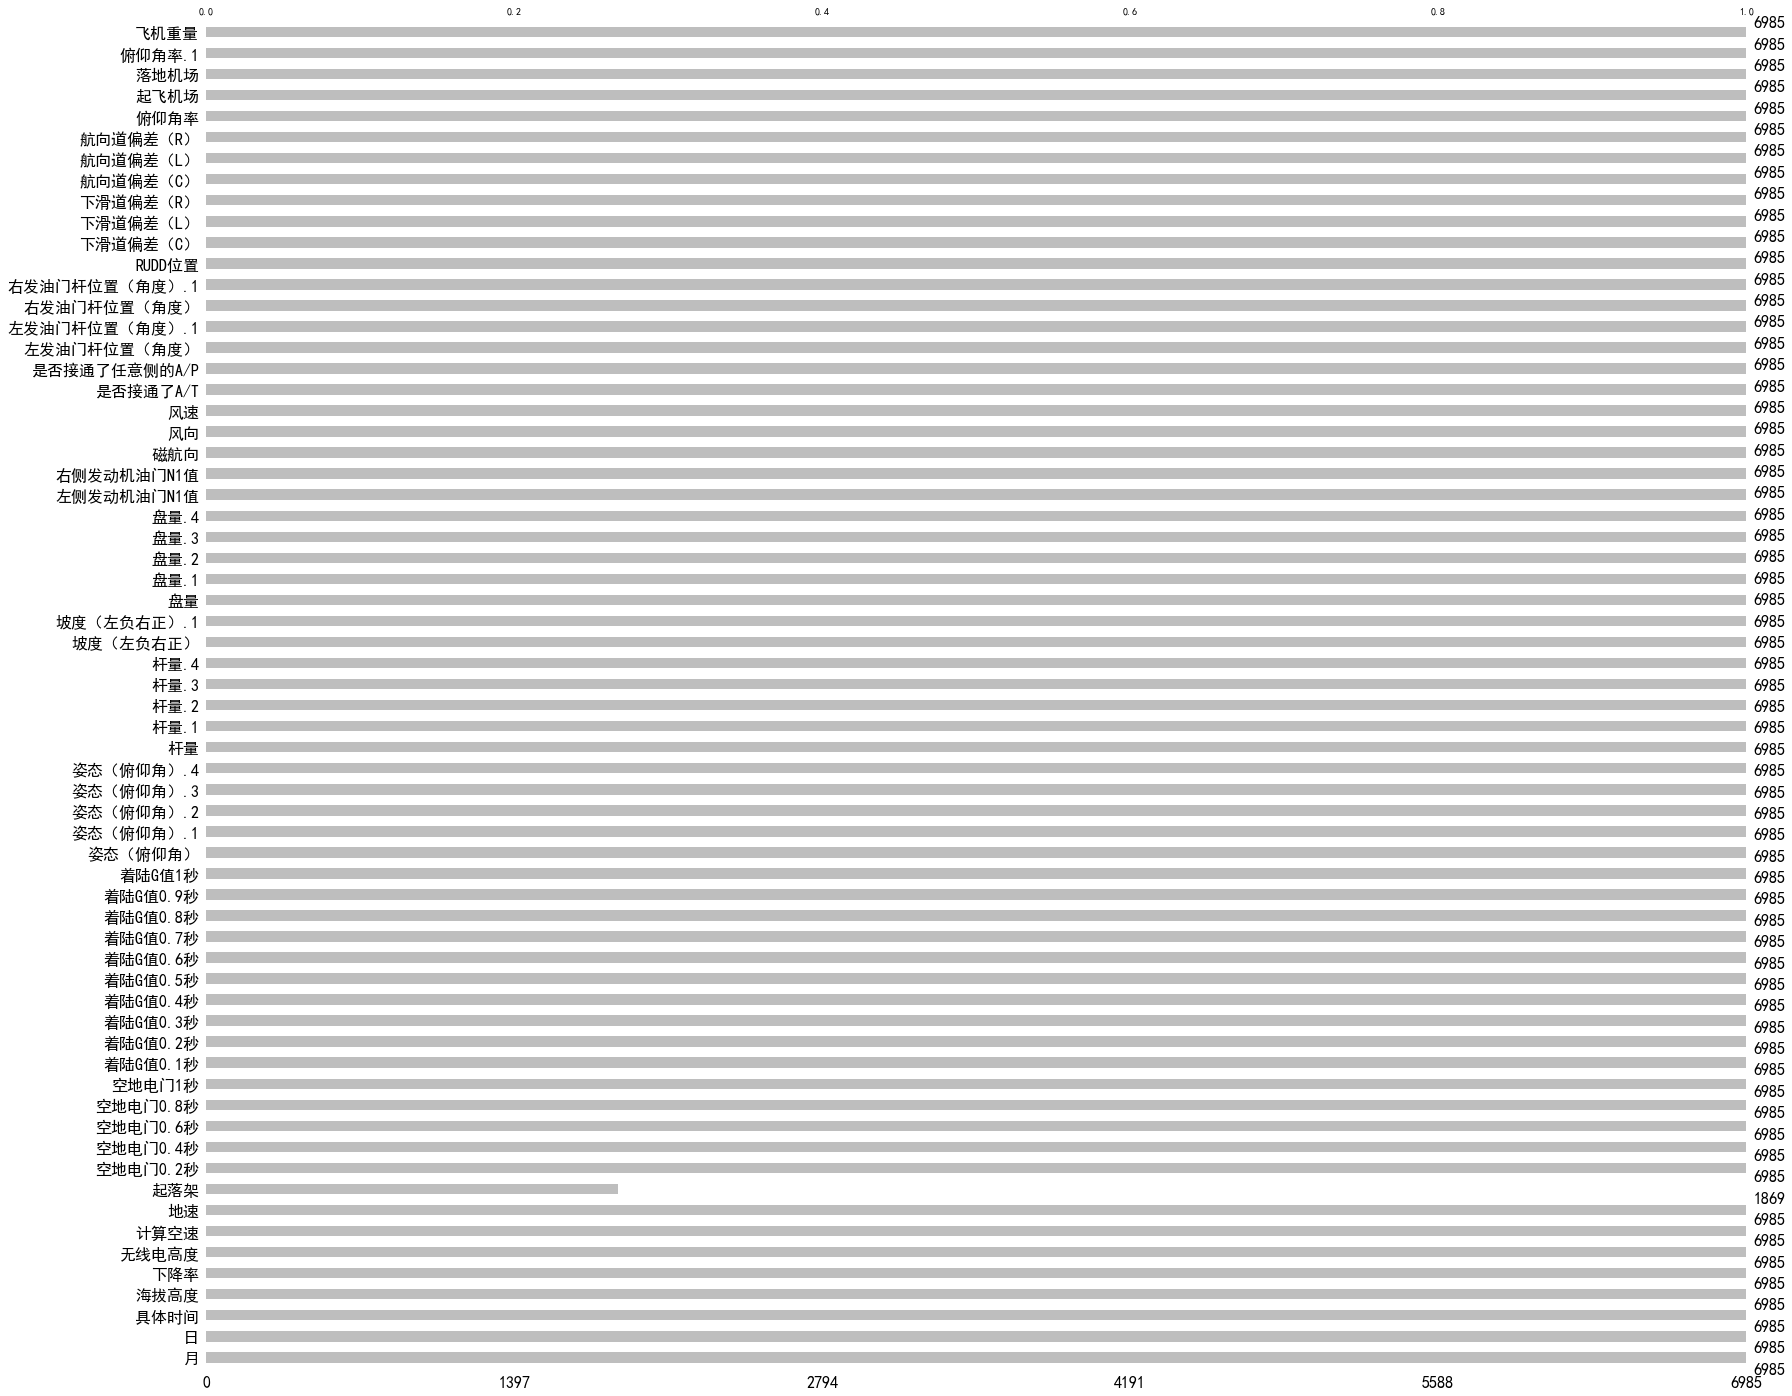

In [4]:
import missingno
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
missingno.bar(data, color=(190/255,190/255,190/255))
plt.tight_layout()

In [5]:
data.replace({"起落架":{'DOWN':1},
              "空地电门0.2秒":{True:1,False:0},
              "空地电门0.4秒":{True:1,False:0},
              "空地电门0.6秒":{True:1,False:0},
              "空地电门0.8秒":{True:1,False:0},
              "空地电门1秒":{True:1,False:0},
              "是否接通了A/T":{'DISENGD':0,'ENGAGED':1},
              "是否接通了任意侧的A/P":{'OFF':0,'ON':1},
              }, inplace=True)
data

,月,日,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,起飞机场,落地机场,俯仰角率.1,飞机重量
0,4,10,8:43:26,-83,1,-8,30.0,10.00,1.0,0,...,-0.04,-3.30,2.59,2.45,2.81,-0.0625,机场68,机场73,-0.0625,250080
1,4,10,8:43:27,-84,8,-8,30.0,9.75,1.0,0,...,1.76,-3.83,3.01,3.39,2.97,0.1250,机场68,机场73,0.1250,250080
2,4,10,8:43:28,-83,6,-8,30.0,9.50,1.0,0,...,-1.54,-2.81,2.95,3.13,3.07,0.0000,机场68,机场73,0.0000,250080
3,4,10,8:43:29,-83,1,-8,30.0,9.25,1.0,0,...,-1.62,-3.42,1.02,1.75,0.99,0.0000,机场68,机场73,0.0000,250080
4,4,10,8:43:30,-83,-2,-8,30.0,9.00,1.0,0,...,0.28,-2.18,3.43,2.64,3.16,0.0625,机场68,机场73,0.0625,250080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6980,4,10,10:39:48,7,-3,-8,30.0,1.50,1.0,0,...,0.60,-2.79,-3.43,-4.92,-3.46,-0.0625,机场68,机场73,-0.0625,236960
6981,4,10,10:39:49,8,-12,-8,30.0,1.50,1.0,0,...,0.58,-2.05,-3.39,-4.97,-3.39,-0.0625,机场68,机场73,-0.0625,236960
6982,4,10,10:39:50,9,-25,-8,30.0,1.50,1.0,0,...,0.67,-1.37,-3.49,-5.03,-3.51,0.0000,机场68,机场73,0.0000,236960
6983,4,10,10:39:51,14,-69,-8,30.0,1.50,1.0,0,...,-0.57,-1.52,-3.12,-5.03,-3.14,0.0000,机场68,机场73,0.0000,236960


In [6]:
data=data.fillna(0)
data

,月,日,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,起飞机场,落地机场,俯仰角率.1,飞机重量
0,4,10,8:43:26,-83,1,-8,30.0,10.00,1.0,0,...,-0.04,-3.30,2.59,2.45,2.81,-0.0625,机场68,机场73,-0.0625,250080
1,4,10,8:43:27,-84,8,-8,30.0,9.75,1.0,0,...,1.76,-3.83,3.01,3.39,2.97,0.1250,机场68,机场73,0.1250,250080
2,4,10,8:43:28,-83,6,-8,30.0,9.50,1.0,0,...,-1.54,-2.81,2.95,3.13,3.07,0.0000,机场68,机场73,0.0000,250080
3,4,10,8:43:29,-83,1,-8,30.0,9.25,1.0,0,...,-1.62,-3.42,1.02,1.75,0.99,0.0000,机场68,机场73,0.0000,250080
4,4,10,8:43:30,-83,-2,-8,30.0,9.00,1.0,0,...,0.28,-2.18,3.43,2.64,3.16,0.0625,机场68,机场73,0.0625,250080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6980,4,10,10:39:48,7,-3,-8,30.0,1.50,1.0,0,...,0.60,-2.79,-3.43,-4.92,-3.46,-0.0625,机场68,机场73,-0.0625,236960
6981,4,10,10:39:49,8,-12,-8,30.0,1.50,1.0,0,...,0.58,-2.05,-3.39,-4.97,-3.39,-0.0625,机场68,机场73,-0.0625,236960
6982,4,10,10:39:50,9,-25,-8,30.0,1.50,1.0,0,...,0.67,-1.37,-3.49,-5.03,-3.51,0.0000,机场68,机场73,0.0000,236960
6983,4,10,10:39:51,14,-69,-8,30.0,1.50,1.0,0,...,-0.57,-1.52,-3.12,-5.03,-3.14,0.0000,机场68,机场73,0.0000,236960


In [7]:
data.drop(labels=['月','日','起飞机场','落地机场','飞机重量'],axis=1,inplace=True)
data

,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,空地电门0.4秒,空地电门0.6秒,...,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1
0,8:43:26,-83,1,-8,30.0,10.00,1.0,0,0,0,...,34.1895,-0.2129,-0.20,-0.04,-3.30,2.59,2.45,2.81,-0.0625,-0.0625
1,8:43:27,-84,8,-8,30.0,9.75,1.0,0,0,0,...,34.1895,-0.2129,2.51,1.76,-3.83,3.01,3.39,2.97,0.1250,0.1250
2,8:43:28,-83,6,-8,30.0,9.50,1.0,0,0,0,...,34.1895,-0.2324,-1.68,-1.54,-2.81,2.95,3.13,3.07,0.0000,0.0000
3,8:43:29,-83,1,-8,30.0,9.25,1.0,0,0,0,...,34.1895,-0.2324,-1.54,-1.62,-3.42,1.02,1.75,0.99,0.0000,0.0000
4,8:43:30,-83,-2,-8,30.0,9.00,1.0,0,0,0,...,34.1895,-0.2285,0.49,0.28,-2.18,3.43,2.64,3.16,0.0625,0.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6980,10:39:48,7,-3,-8,30.0,1.50,1.0,0,0,0,...,34.1455,-0.2656,0.71,0.60,-2.79,-3.43,-4.92,-3.46,-0.0625,-0.0625
6981,10:39:49,8,-12,-8,30.0,1.50,1.0,0,0,0,...,34.0576,-0.2656,0.83,0.58,-2.05,-3.39,-4.97,-3.39,-0.0625,-0.0625
6982,10:39:50,9,-25,-8,30.0,1.50,1.0,0,0,0,...,34.1455,-0.2637,0.42,0.67,-1.37,-3.49,-5.03,-3.51,0.0000,0.0000
6983,10:39:51,14,-69,-8,30.0,1.50,1.0,0,0,0,...,34.1455,-0.2637,-0.39,-0.57,-1.52,-3.12,-5.03,-3.14,0.0000,0.0000


# QAR异常判断，剔除

In [8]:
dup_row = data.duplicated(subset=['具体时间'], keep=False)
data.insert(0, 'is_dup', dup_row)
data[data['is_dup'] == True]

,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,空地电门0.4秒,...,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1
66,True,8:44:32,-87,-1,-8,30.00,18.75,1.0,0,0,...,34.1895,-0.2637,5.00,4.12,-0.37,-1.38,1.06,-1.39,0.0000,0.0000
67,True,8:44:32,-87,5,-8,30.00,19.00,1.0,0,0,...,34.1895,-0.2637,-2.07,-2.11,-3.01,0.30,1.19,-0.24,0.0000,0.0000
3272,True,9:37:59,33100,3,1404,296.75,512.00,0.0,1,1,...,55.1074,-0.2734,0.83,0.43,0.50,-0.07,0.03,0.02,-0.0625,-0.0625
3273,True,9:37:59,33099,7,1404,297.00,512.00,0.0,1,1,...,55.0195,-0.2734,0.42,-0.02,0.12,-0.01,-0.04,-0.02,0.0000,0.0000
6501,True,10:31:49,5,12,-8,30.00,12.75,1.0,0,0,...,34.1455,-0.2617,-0.92,-1.02,0.12,-2.84,-3.05,-3.10,0.0000,0.0000
6502,True,10:31:49,5,14,-8,30.00,12.00,1.0,0,0,...,34.1455,-0.2520,-2.56,-2.66,-0.71,-3.33,-2.91,-4.04,0.1875,0.1875


In [9]:
data=data.drop_duplicates(subset=['具体时间'],keep='first')
data

,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,空地电门0.4秒,...,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1
0,False,8:43:26,-83,1,-8,30.0,10.00,1.0,0,0,...,34.1895,-0.2129,-0.20,-0.04,-3.30,2.59,2.45,2.81,-0.0625,-0.0625
1,False,8:43:27,-84,8,-8,30.0,9.75,1.0,0,0,...,34.1895,-0.2129,2.51,1.76,-3.83,3.01,3.39,2.97,0.1250,0.1250
2,False,8:43:28,-83,6,-8,30.0,9.50,1.0,0,0,...,34.1895,-0.2324,-1.68,-1.54,-2.81,2.95,3.13,3.07,0.0000,0.0000
3,False,8:43:29,-83,1,-8,30.0,9.25,1.0,0,0,...,34.1895,-0.2324,-1.54,-1.62,-3.42,1.02,1.75,0.99,0.0000,0.0000
4,False,8:43:30,-83,-2,-8,30.0,9.00,1.0,0,0,...,34.1895,-0.2285,0.49,0.28,-2.18,3.43,2.64,3.16,0.0625,0.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6980,False,10:39:48,7,-3,-8,30.0,1.50,1.0,0,0,...,34.1455,-0.2656,0.71,0.60,-2.79,-3.43,-4.92,-3.46,-0.0625,-0.0625
6981,False,10:39:49,8,-12,-8,30.0,1.50,1.0,0,0,...,34.0576,-0.2656,0.83,0.58,-2.05,-3.39,-4.97,-3.39,-0.0625,-0.0625
6982,False,10:39:50,9,-25,-8,30.0,1.50,1.0,0,0,...,34.1455,-0.2637,0.42,0.67,-1.37,-3.49,-5.03,-3.51,0.0000,0.0000
6983,False,10:39:51,14,-69,-8,30.0,1.50,1.0,0,0,...,34.1455,-0.2637,-0.39,-0.57,-1.52,-3.12,-5.03,-3.14,0.0000,0.0000


In [10]:
dup_row = data.duplicated(subset=['具体时间'], keep=False)
data.insert(0, 'is_dup_N', dup_row)
data[data['is_dup_N'] == True]

,is_dup_N,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1


In [11]:
def function(a, b):
    if a == b:
        return 1
    else:
        return 0


data['bool'] = data.apply(lambda x : function(x['俯仰角率'],x['俯仰角率.1']),axis = 1)
data

D:\TempS\ipykernel_21336\3231745931.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bool'] = data.apply(lambda x : function(x['俯仰角率'],x['俯仰角率.1']),axis = 1)


,is_dup_N,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1,bool
0,False,False,8:43:26,-83,1,-8,30.0,10.00,1.0,0,...,-0.2129,-0.20,-0.04,-3.30,2.59,2.45,2.81,-0.0625,-0.0625,1
1,False,False,8:43:27,-84,8,-8,30.0,9.75,1.0,0,...,-0.2129,2.51,1.76,-3.83,3.01,3.39,2.97,0.1250,0.1250,1
2,False,False,8:43:28,-83,6,-8,30.0,9.50,1.0,0,...,-0.2324,-1.68,-1.54,-2.81,2.95,3.13,3.07,0.0000,0.0000,1
3,False,False,8:43:29,-83,1,-8,30.0,9.25,1.0,0,...,-0.2324,-1.54,-1.62,-3.42,1.02,1.75,0.99,0.0000,0.0000,1
4,False,False,8:43:30,-83,-2,-8,30.0,9.00,1.0,0,...,-0.2285,0.49,0.28,-2.18,3.43,2.64,3.16,0.0625,0.0625,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6980,False,False,10:39:48,7,-3,-8,30.0,1.50,1.0,0,...,-0.2656,0.71,0.60,-2.79,-3.43,-4.92,-3.46,-0.0625,-0.0625,1
6981,False,False,10:39:49,8,-12,-8,30.0,1.50,1.0,0,...,-0.2656,0.83,0.58,-2.05,-3.39,-4.97,-3.39,-0.0625,-0.0625,1
6982,False,False,10:39:50,9,-25,-8,30.0,1.50,1.0,0,...,-0.2637,0.42,0.67,-1.37,-3.49,-5.03,-3.51,0.0000,0.0000,1
6983,False,False,10:39:51,14,-69,-8,30.0,1.50,1.0,0,...,-0.2637,-0.39,-0.57,-1.52,-3.12,-5.03,-3.14,0.0000,0.0000,1


In [12]:
data[data['bool']==0]

,is_dup_N,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1,bool


In [13]:
data=data.drop(labels=['is_dup','is_dup_N','bool','具体时间','俯仰角率.1'],axis=1)
data

,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,空地电门0.4秒,空地电门0.6秒,空地电门0.8秒,...,右发油门杆位置（角度）,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率
0,-83,1,-8,30.0,10.00,1.0,0,0,0,0,...,34.1895,34.1895,-0.2129,-0.20,-0.04,-3.30,2.59,2.45,2.81,-0.0625
1,-84,8,-8,30.0,9.75,1.0,0,0,0,0,...,34.1895,34.1895,-0.2129,2.51,1.76,-3.83,3.01,3.39,2.97,0.1250
2,-83,6,-8,30.0,9.50,1.0,0,0,0,0,...,34.1895,34.1895,-0.2324,-1.68,-1.54,-2.81,2.95,3.13,3.07,0.0000
3,-83,1,-8,30.0,9.25,1.0,0,0,0,0,...,34.1895,34.1895,-0.2324,-1.54,-1.62,-3.42,1.02,1.75,0.99,0.0000
4,-83,-2,-8,30.0,9.00,1.0,0,0,0,0,...,34.1895,34.1895,-0.2285,0.49,0.28,-2.18,3.43,2.64,3.16,0.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6980,7,-3,-8,30.0,1.50,1.0,0,0,0,0,...,34.1455,34.1455,-0.2656,0.71,0.60,-2.79,-3.43,-4.92,-3.46,-0.0625
6981,8,-12,-8,30.0,1.50,1.0,0,0,0,0,...,34.1455,34.0576,-0.2656,0.83,0.58,-2.05,-3.39,-4.97,-3.39,-0.0625
6982,9,-25,-8,30.0,1.50,1.0,0,0,0,0,...,34.1016,34.1455,-0.2637,0.42,0.67,-1.37,-3.49,-5.03,-3.51,0.0000
6983,14,-69,-8,30.0,1.50,1.0,0,0,0,0,...,34.1455,34.1455,-0.2637,-0.39,-0.57,-1.52,-3.12,-5.03,-3.14,0.0000
